# Multi-class Classification

We've referenced the TinyVGG architecture from the CNN Explainer website multiple times through this notebook, however, the CNN Explainer website works with 10 different image classes, where as our current model only works with two classes (pizza and steak).

> 🛠 **Practice:** Before scrolling down, how do you think we might change our model to work with 10 classes of the same kind of images? Assume the data is in the same style as our two class problem.

Remember the steps we took before to build our pizza 🍕 vs. steak 🥩 classifier?

How about we go through those steps again, except this time, we'll work with 10 different types of food.

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/misc-tensorflow-workflow-outline.png)
*The workflow we're about to go through is a slightly modified version of the above image. As you keep going through deep learning problems, you'll find the workflow above is more of an outline than a step-by-step guide.*

## 1. Import and become one with the data

Again, we've got a subset of the [Food101 dataset](https://www.kaggle.com/dansbecker/food-101). In addition to the pizza and steak images, we've pulled out another eight classes.

In [1]:
# Download zip file of 10_food_classes images
# (Skip, load the data locally)

Now let's check out all of the different directories and sub-directories in the `10_food_classes` file.

In [2]:
import os

food_classes_dir = "data/image_data/food_classes"

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk(food_classes_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'data/image_data/food_classes'.
There are 10 directories and 0 images in 'data/image_data/food_classes/test'.
There are 0 directories and 250 images in 'data/image_data/food_classes/test/chicken_curry'.
There are 0 directories and 250 images in 'data/image_data/food_classes/test/chicken_wings'.
There are 0 directories and 250 images in 'data/image_data/food_classes/test/fried_rice'.
There are 0 directories and 250 images in 'data/image_data/food_classes/test/grilled_salmon'.
There are 0 directories and 250 images in 'data/image_data/food_classes/test/hamburger'.
There are 0 directories and 250 images in 'data/image_data/food_classes/test/ice_cream'.
There are 0 directories and 250 images in 'data/image_data/food_classes/test/pizza'.
There are 0 directories and 250 images in 'data/image_data/food_classes/test/ramen'.
There are 0 directories and 250 images in 'data/image_data/food_classes/test/steak'.
There are 0 directories and 250 images in 'data

Looking good!

We'll now setup the training and test directory paths.

In [3]:
train_dir = food_classes_dir + "/train/"
test_dir = food_classes_dir + "/test/"

And get the class names from the subdirectories.

In [4]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


How about we visualize an image from the training set?

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off") # Turn off axis
    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

Image shape: (512, 512, 3)


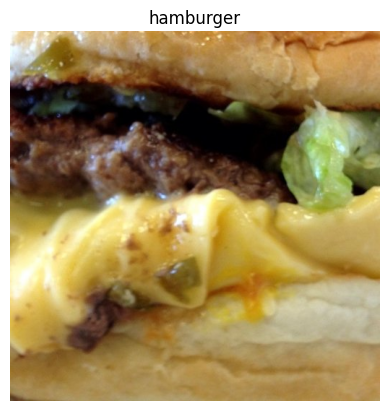

In [6]:
# View a random image from the training dataset
import random
img = view_random_image(
    target_dir=train_dir,
    target_class=random.choice(class_names) # get a random class name
)